**<div style="text-align: center; font-size: 24px;">Machine Failure Prediction and Classification</div>**


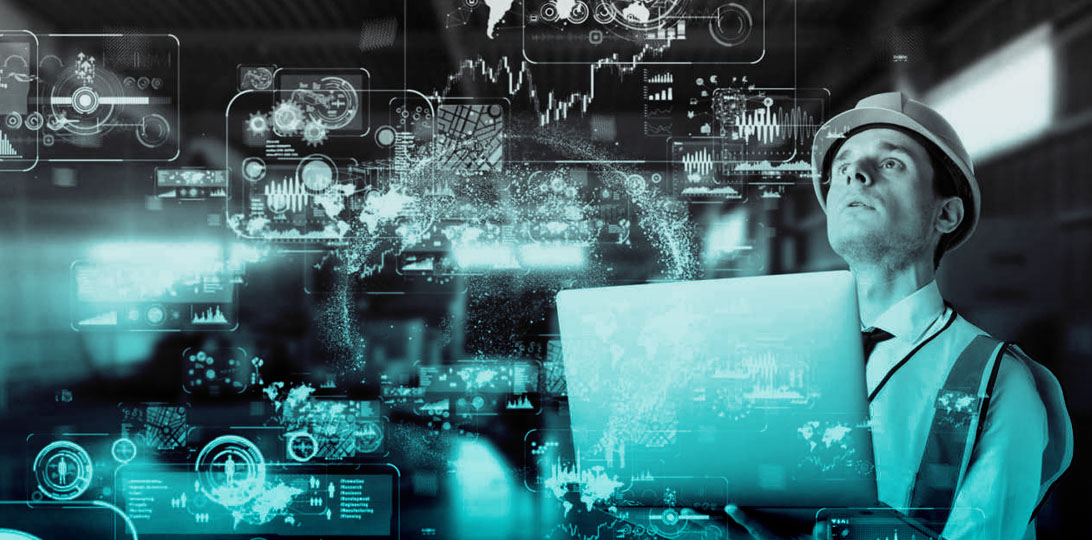

**- Business Problem:**

- In today's competitive industrial landscape, maximizing operational efficiency and minimizing downtime are critical objectives for organizations across various sectors. However, the reliability and performance of machinery pose significant challenges. Unforeseen equipment failures not only disrupt production schedules but also incur substantial repair costs and jeopardize employee safety.


- Traditional maintenance approaches, often reactive in nature, are no longer sufficient to address these challenges. Waiting for machinery to break down before taking action leads to costly downtime and hampers overall productivity. Therefore, there is a pressing need for proactive strategies that can anticipate potential failures and enable timely intervention to mitigate their impact.

**- Proposed Solution:**

- To tackle the business problem of machine failure prediction and classification, predictive maintenance offers a compelling solution. By leveraging advanced technologies and analytical techniques, predictive maintenance aims to anticipate potential failures based on data collected from machinery systems.


- Key parameters such as product quality type, air temperature, process temperature, rotational speed, torque, and tool wear serve as valuable indicators in predicting machinery health. Analyzing these parameters over time allows predictive models to identify patterns and anomalies indicative of impending failures.


- QuAM (Query Answering Machine) emerges as a powerful tool to address the business problem at hand. Equipped with a trained machine learning model, QuAM provides actionable insights into machinery health and performance. By inputting relevant information about a machine's operational characteristics and historical data, users can obtain predictive insights regarding potential failures and their associated types.

**Problem Type:**

Multi Class Classification

# D2.1: Data Collection:

**1- Finding a dataset:**

    https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

**Dataset Composition:**

1. **UID:** Unique identifiers ranging from 1 to 10,000.

2. **productID:** Comprising a letter (L, M, or H) indicating low (50% of all products), medium (30%), and high (20%) product quality variants, along with a variant-specific serial number.

3. **air temperature [K]:** Generated via a random walk process and subsequently normalized to a standard deviation of 2 K around 300 K.

4. **process temperature [K]:** Generated through a random walk process normalized to a standard deviation of 1 K, then added to the air temperature plus 10 K.

5. **rotational speed [rpm]:** Derived from a power of 2860 W, with normally distributed noise overlaid.

6. **torque [Nm]:** Torque values follow a normal distribution around 40 Nm, with a standard deviation of 10 Nm and no negative values.

7. **tool wear [min]:** Tool wear duration, where quality variants H/M/L add 5/3/2 minutes respectively to the used tool in the process.

8. **Target:** Indicates whether the machine has failed (Failure) or not (Not Failure).

9. **Failure Type:** Specifies the type of failure if the machine has indeed failed.

**2- Read dataset and Display the first top rows:**

In [281]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('Predictive Maintenance Dataset.csv')

#Display the first top rows to get an initial understanding of the data
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


**3- Drop unnecessary columns to improve data clarity:**

In [282]:
# List of unnecessary columns to be removed
columns_to_remove = ['Product ID', 'UDI', 'Target']

# Remove unnecessary columns
data = data.drop(columns=columns_to_remove)
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


**4- Rename columns:**

In [283]:
# Renaming columns to enhance clarity and better convey their meaning

data.rename(columns={'Type': 'Product Quality Type'}, inplace=True)
data.rename(columns={'Air temperature [K]': 'Air temperature'}, inplace=True)
data.rename(columns={'Process temperature [K]': 'Process temperature'}, inplace=True)
data.rename(columns={'Rotational speed [rpm]': 'Rotational speed'}, inplace=True)
data.rename(columns={'Torque [Nm]': 'Torque'}, inplace=True)
data.rename(columns={'Tool wear [min]': 'Tool wear'}, inplace=True)
data.rename(columns={'Failure Type': 'Machine Failure Type'}, inplace=True)

data.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


# D2.2: Data Analysis: Exploratory Data Analysis (EDA)

**1- Check the dimensions of the dataset:**

In [284]:
# Check the dimensions of the dataset
num_rows, num_columns = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 10000
Number of columns: 7


**2- Inspect the data types of each column:**

In [285]:
# Inspect the data types of each column
column_data_types = data.dtypes
print(column_data_types)

Product Quality Type     object
Air temperature         float64
Process temperature     float64
Rotational speed          int64
Torque                  float64
Tool wear                 int64
Machine Failure Type     object
dtype: object


**Insights:**

- The dataset consists of 7 columns.


- Out of these, 5 columns are numerical features: 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear'.


- Additionally, there are 2 categorical features: 'Product Quality Type', 'Machine Failure Type'.


- To prepare the dataset for machine learning models like logistic regression, encoding techniques such as label encoding can be applied to the categorical features for numerical representation.

**3- Check for missing values:**

In [286]:
# Check for missing values
missing_values_exist = data.isnull().values.any()

# Print whether missing values exist or not
if missing_values_exist:
    print("Missing values exist.")
else:
    print("No missing values.")

No missing values.


**4- Check for duplicates:**

In [287]:
# Check for duplicates
duplicates_exist = data.duplicated().any()

# Print whether duplicates exist or not
if duplicates_exist:
    print("Duplicates exist.")
else:
    print("No duplicates.")

No duplicates.


**5- Summary Statistics for numerical columns:**

In [288]:
# Compute summary statistics
summary_stats = data.describe()

# Print out the summary statistics
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


**6- Summary Statistics for categorical columns:**

In [289]:
# Unique Values and Frequency Counts
for column in ['Product Quality Type', 'Machine Failure Type']:
    unique_values = data[column].unique()
    frequency_counts = data[column].value_counts()
    mode_value = data[column].mode()[0]
    
    print(f"{column} - Unique Values:")
    print(unique_values)
    print(f"\n{column} - Frequency Counts:")
    print(frequency_counts)
    print(f"\n{column} - Mode:")
    print(mode_value)
    print("\n")

Product Quality Type - Unique Values:
['M' 'L' 'H']

Product Quality Type - Frequency Counts:
L    6000
M    2997
H    1003
Name: Product Quality Type, dtype: int64

Product Quality Type - Mode:
L


Machine Failure Type - Unique Values:
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']

Machine Failure Type - Frequency Counts:
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Machine Failure Type, dtype: int64

Machine Failure Type - Mode:
No Failure




**7- Visualize the distribution of numerical variables:**

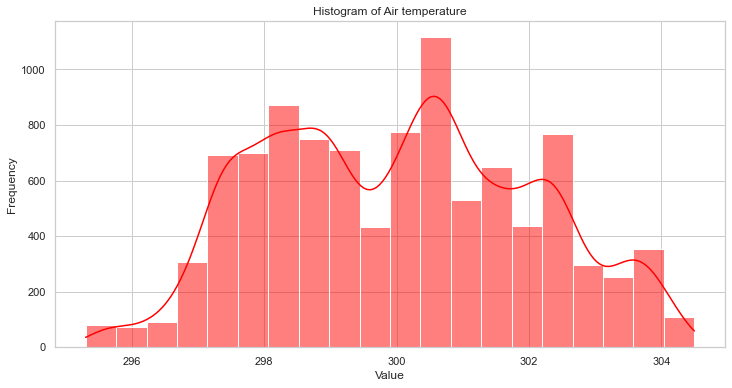

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(data['Air temperature'], bins=20, kde=True, color='Red')
plt.title('Histogram of Air temperature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

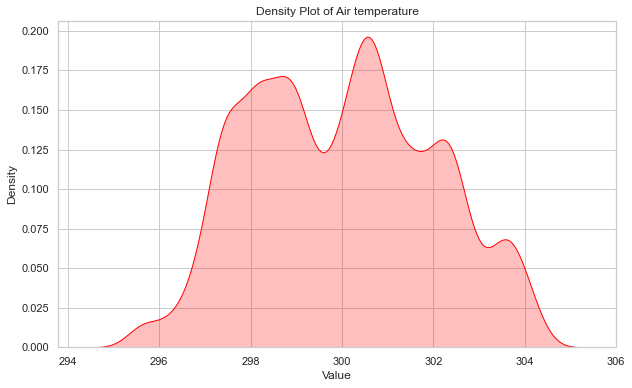

In [291]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Air temperature'], shade=True, color='Red')
plt.title('Density Plot of Air temperature')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

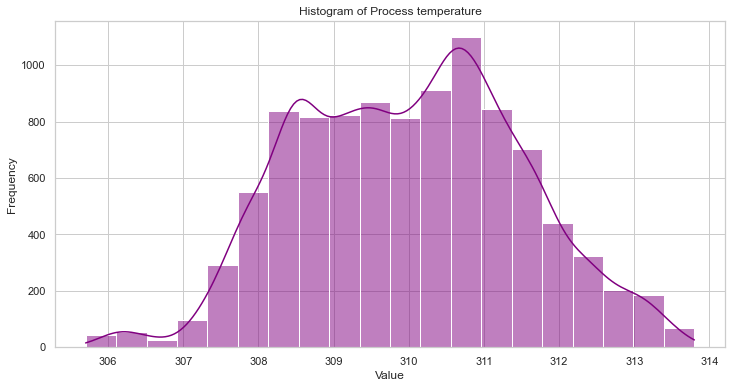

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(data['Process temperature'], bins=20, kde=True, color='purple') 
plt.title('Histogram of Process temperature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

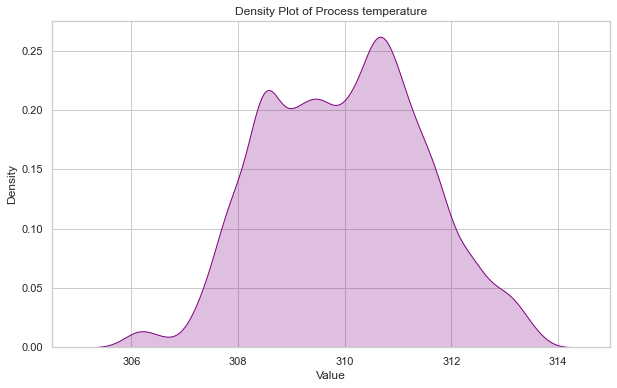

In [293]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Process temperature'], shade=True, color='purple')
plt.title('Density Plot of Process temperature')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

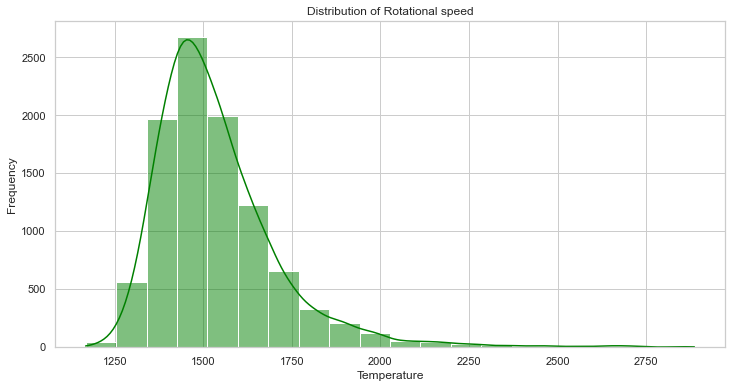

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Rotational speed'], bins=20, kde=True, color='green')  # Change the color here
plt.title('Distribution of Rotational speed')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

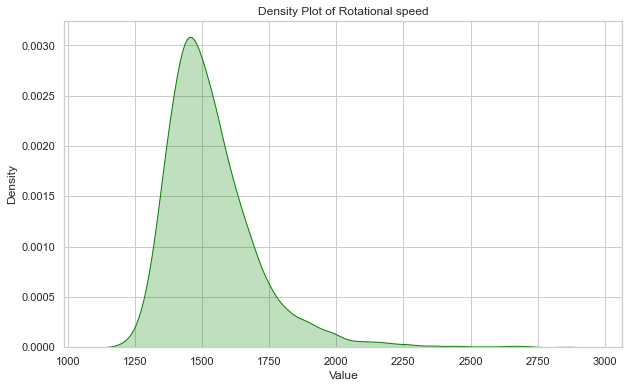

In [295]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Rotational speed'], shade=True, color='green')  # Change the color here
plt.title('Density Plot of Rotational speed')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

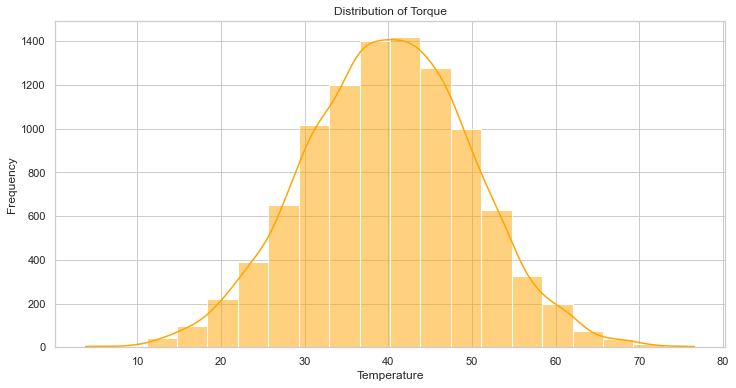

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Torque'], bins=20, kde=True, color='Orange') 
plt.title('Distribution of Torque')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

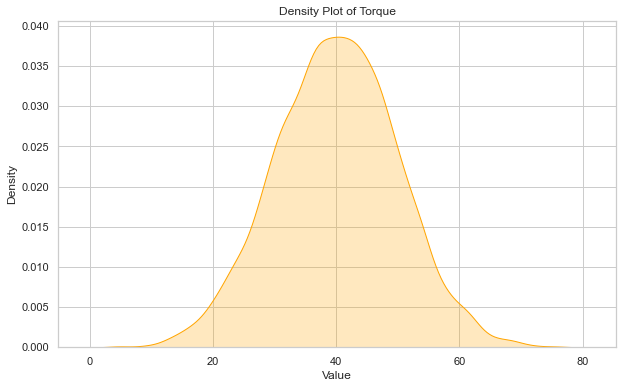

In [297]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Torque'], shade=True, color='Orange')  # Change the color here
plt.title('Density Plot of Torque')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

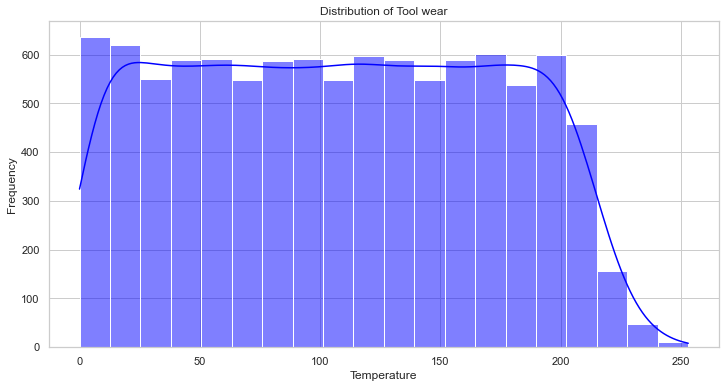

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Tool wear'], bins=20, kde=True, color='blue') 
plt.title('Distribution of Tool wear')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

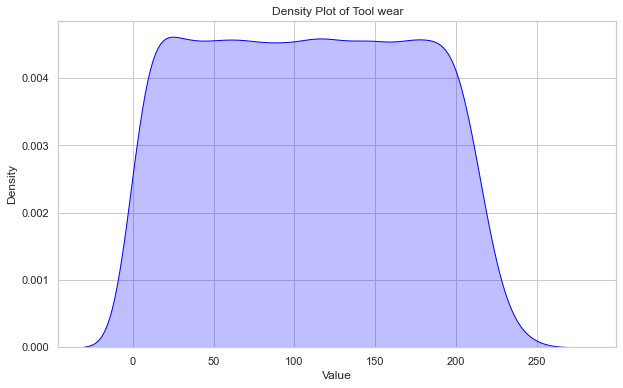

In [299]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Tool wear'], shade=True, color='blue')  # Change the color here
plt.title('Density Plot of Tool wear')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

**8- Explore the distribution of categorical variables:**

**- Explore the distribution of Product Quality Type using bar plots:**

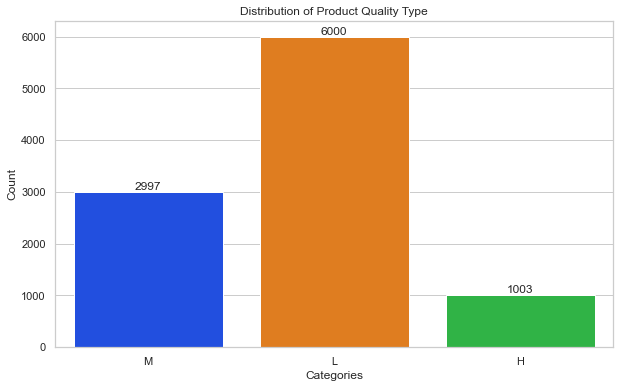

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot with Bright Colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Product Quality Type', palette='bright') 
plt.title('Distribution of Product Quality Type')
plt.xlabel('Categories')
plt.ylabel('Count')

# Plot count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

**- Explore the distribution of Machine Failure Type using bar plots:**

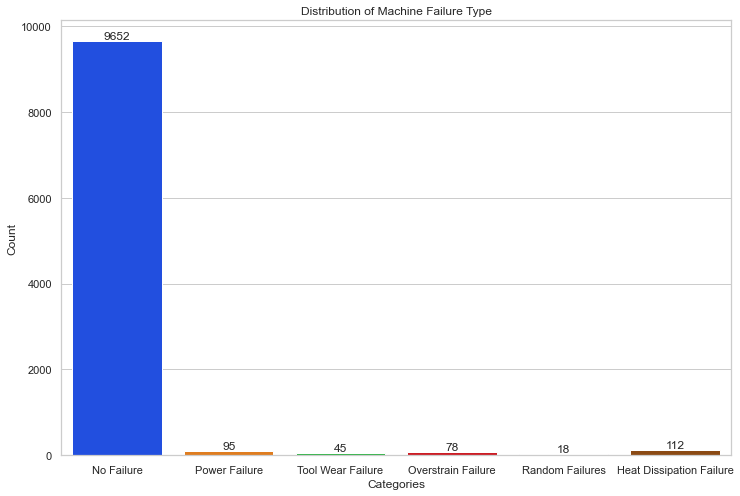

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot with Bright Colors
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=data, x='Machine Failure Type', palette='bright') 
plt.title('Distribution of Machine Failure Type')
plt.xlabel('Categories')
plt.ylabel('Count')

# Plot count values on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

In [302]:
import pandas as pd

# Crosstab
crosstab = pd.crosstab(data['Machine Failure Type'], data['Product Quality Type'])
print("Crosstab:")
print(crosstab)
print()

Crosstab:
Product Quality Type        H     L     M
Machine Failure Type                     
Heat Dissipation Failure    8    74    30
No Failure                979  5757  2916
Overstrain Failure          1    73     4
Power Failure               5    59    31
Random Failures             4    12     2
Tool Wear Failure           6    25    14



**- Explore pairwise relationships between numerical variables using correlation matrices:**

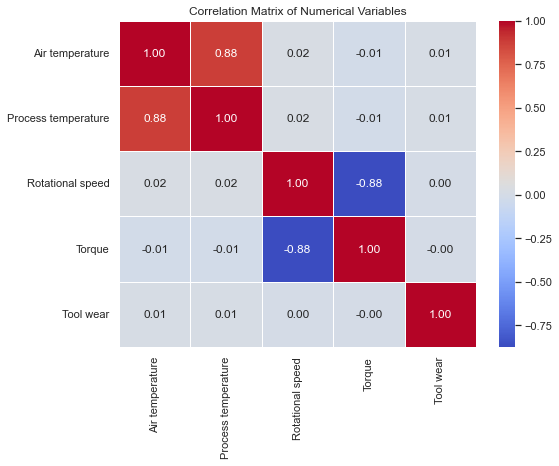

In [303]:
# Correlation Matrix
correlation_matrix = data[['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Insights:**
    
    - Each cell in the matrix represents the correlation coefficient between two variables.
    
    - The coefficient ranges from -1 to 1:
        
        - A positive value (closer to 1) indicates a direct positive relationship.
        
        - A negative value (closer to -1) indicates an inverse relationship.
        
        - A value near 0 suggests no significant linear relationship.
        
        * The cell corresponding to “air temperature” and “process temperature” has a high positive value [0.88], it implies that as air temperature increases, process temperature tends to increase as well.
        
        * The cell corresponding to “Torque” and “Tool wear” has a high negative value [-0.88], it implies that as Torque increases, Tool wear tends to decrease and vise verca.

**- Relationships Between Variables using scatter plots:**

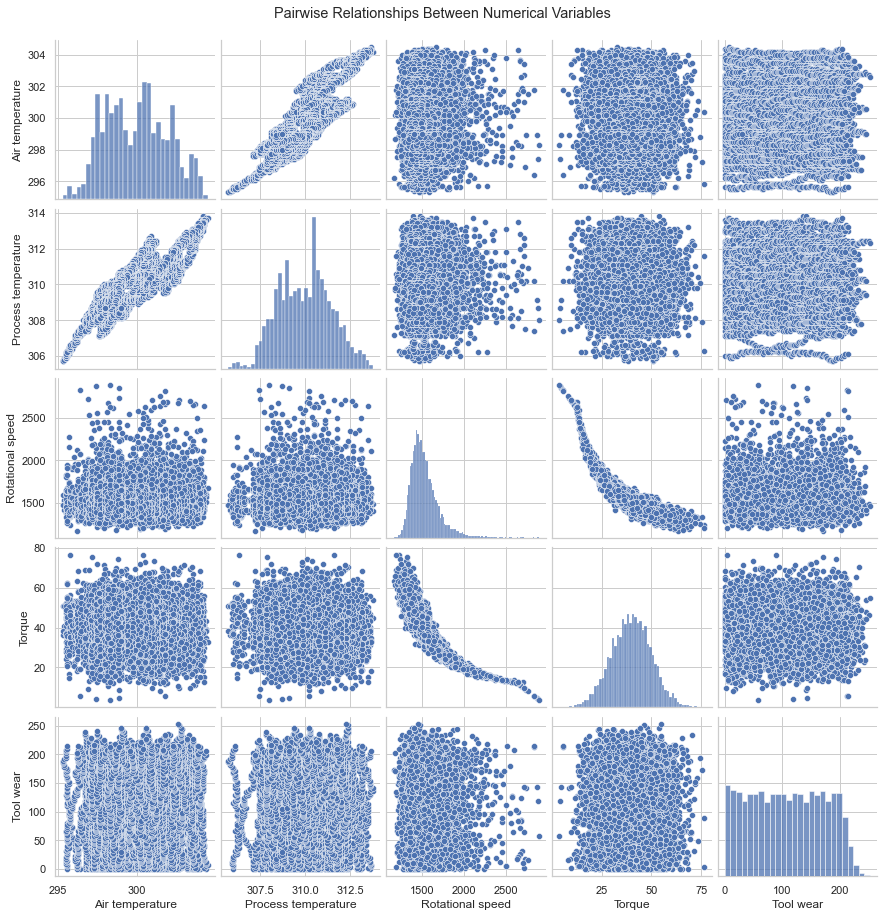

In [304]:
# Pairwise Scatter Plots
sns.pairplot(data=data, vars=['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear'])  
plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02)
plt.show()

**9- Investigate the relationship between numerical and categorical variables:**

**- The relationship between Machine Failure Type and Air temperature:**

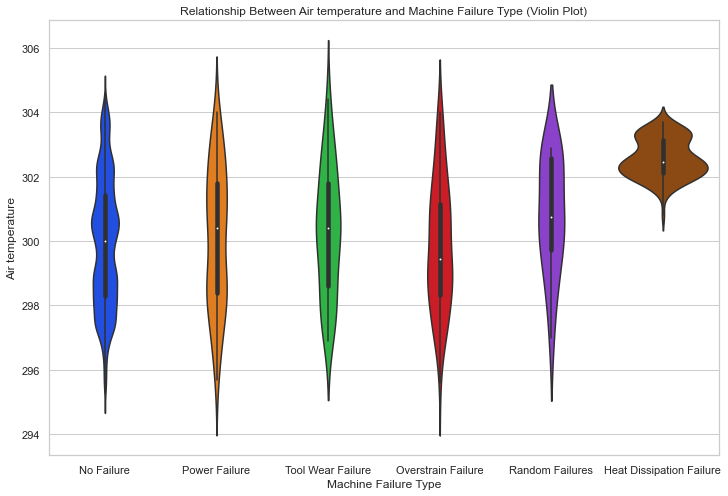

In [305]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Machine Failure Type', y='Air temperature', palette='bright')
plt.title('Relationship Between Air temperature and Machine Failure Type (Violin Plot)')
plt.xlabel('Machine Failure Type')
plt.ylabel('Air temperature')
plt.show()

**- Insights:**
    
    - The plot shows how the air temperature distribution varies for different machine failure types.
    
    - Tall Violin (Narrow):
        
         - A tall violin indicates that the data points are concentrated around a specific value.
            
         - It suggests that the distribution is relatively less spread out.
        
         - The density curve is tall and thin, showing that most data points are close together.
        
        
    - Short Violin (Wide):
        
          - A short violin suggests that the data points are more spread out.
            
          - It indicates a larger variability in the data.
        
          - The density curve is shorter and wider, indicating a broader range of values.

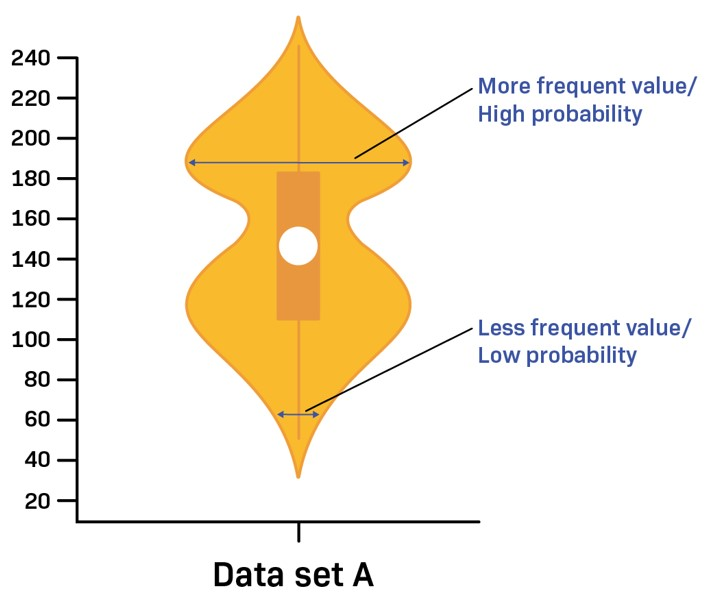

**- The relationship between Machine Failure Type and Process temperature:**

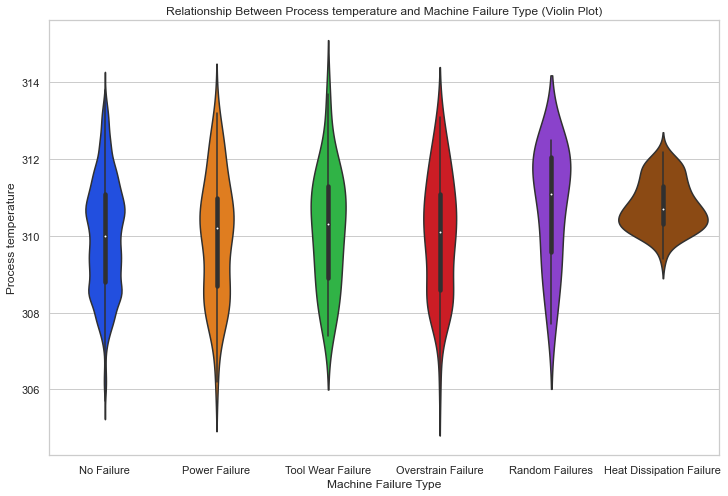

In [306]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Machine Failure Type', y='Process temperature', palette='bright')
plt.title('Relationship Between Process temperature and Machine Failure Type (Violin Plot)')
plt.xlabel('Machine Failure Type')
plt.ylabel('Process temperature')
plt.show()

**- The relationship between Machine Failure Type and Rotational speed:**

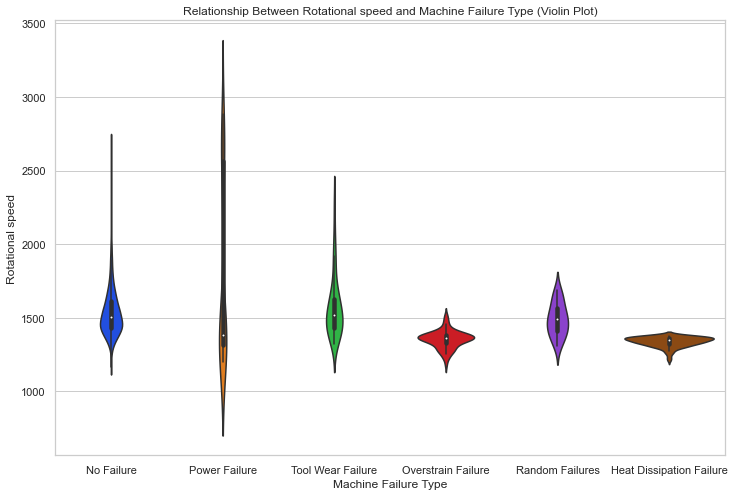

In [307]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Machine Failure Type', y='Rotational speed', palette='bright')
plt.title('Relationship Between Rotational speed and Machine Failure Type (Violin Plot)')
plt.xlabel('Machine Failure Type')
plt.ylabel('Rotational speed')
plt.show()

**- The relationship between Machine Failure Type and Torque:**

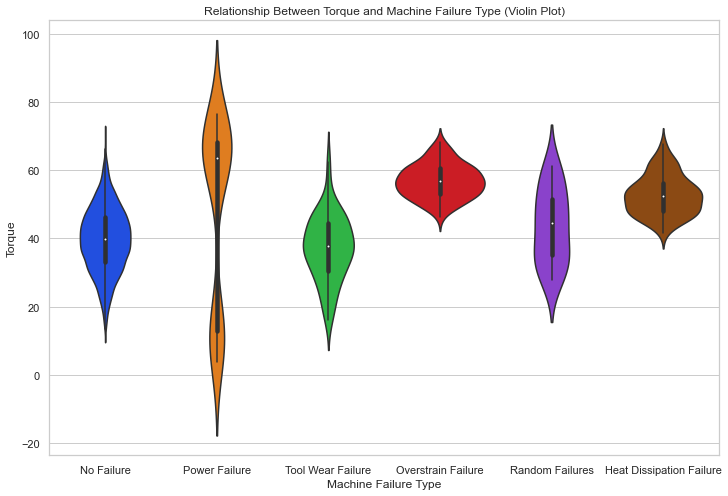

In [308]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Machine Failure Type', y='Torque', palette='bright')
plt.title('Relationship Between Torque and Machine Failure Type (Violin Plot)')
plt.xlabel('Machine Failure Type')
plt.ylabel('Torque')
plt.show()

**- The relationship between Machine Failure Type and Tool wear:**

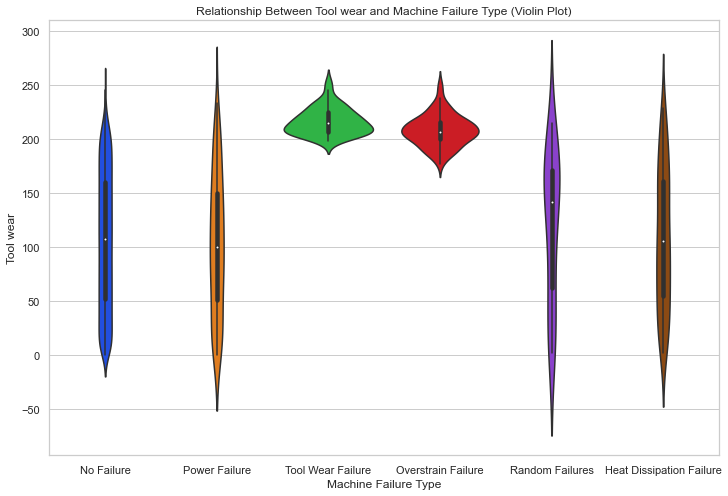

In [309]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Machine Failure Type', y='Tool wear', palette='bright')
plt.title('Relationship Between Tool wear and Machine Failure Type (Violin Plot)')
plt.xlabel('Machine Failure Type')
plt.ylabel('Tool wear')
plt.show()

**- Visualize Class Distribution after data filtering:**

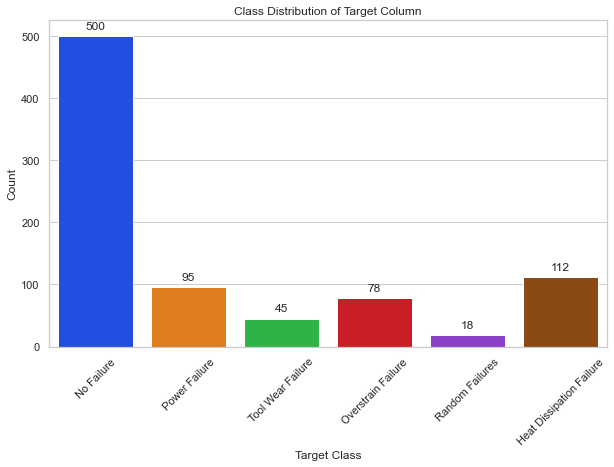

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Set plot style
plt.figure(figsize=(10, 6))  # Enlarge the plot

# Define bright and clear colors
colors = sns.color_palette("bright", len(final_subset['Machine Failure Type'].unique()))

# Create countplot with specified colors
ax = sns.countplot(x='Machine Failure Type', data=final_subset, palette=colors)

# Add count values above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.title('Class Distribution of Target Column')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

plt.show()

**Insights:**
    
    -The class distribution analysis reveals that the 'No Failure' class overwhelmingly dominates the dataset, constituting a significant proportion of the samples. Conversely, the presence of other failure classes appears to be comparatively sparse. This imbalance indicates that the dataset is skewed towards the 'No Failure' class, potentially leading to biased model performance. To mitigate this issue and ensure fair representation of all classes, techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can be employed to balance the dataset by generating synthetic samples for minority classes or subsampling the majority class."







# D2.3: Data Wrangling:

**- Identifying outliers in numerical variables:**

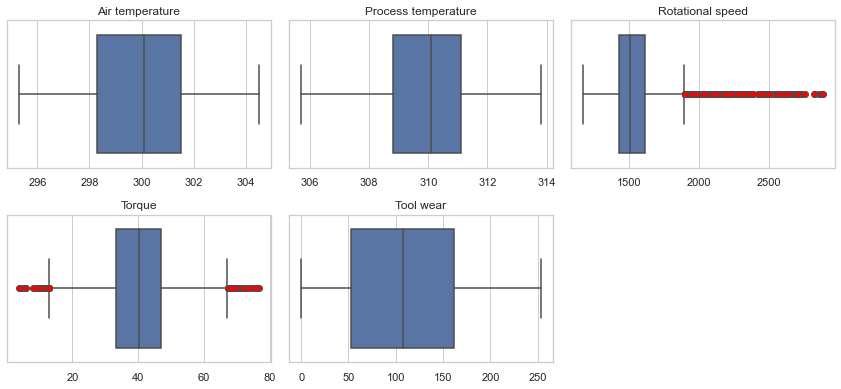

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for all numeric variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**- Very important Insight!**
    
    While we have identified outliers in the dataset, it's important to note that in the domain of failure prediction in machines, these outliers may carry significant meaning and should not be simply discarded. Outliers in machine data can often represent abnormal operating conditions, rare failure events, or anomalies that are crucial for understanding the health and performance of the machines. Ignoring these outliers could lead to a loss of important insights and hinder the effectiveness of our predictive models. Therefore, we should carefully analyze and consider these outliers in our analysis, as they may provide valuable clues for detecting and mitigating potential failures in the machines

In [312]:
data.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


**- Introduce missing values:** 

Since the data don't contain missing values, we will create some of them and then we will fill them.

In [315]:
# Introduce missing values in 'Air temperature' and 'Product Quality Type' columns
num_missing = 36  # Number of missing values to introduce in 'Air temperature' column
cat_missing = 18  # Number of missing values to introduce in 'Product Quality Type' column

# Introduce missing values in numeric column 'Air temperature'
num_indices = np.random.choice(data.index, num_missing, replace=False)
data.loc[num_indices, 'Air temperature'] = np.nan

# Introduce missing values in categorical column 'Product Quality Type'
cat_indices = np.random.choice(data.index, cat_missing, replace=False)
data.loc[cat_indices, 'Product Quality Type'] = np.nan

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Product Quality Type    18
Air temperature         36
Process temperature      0
Rotational speed         0
Torque                   0
Tool wear                0
Machine Failure Type     0
dtype: int64


**- Filling the missing values:**

In [316]:
# Fill missing values in 'Air temperature' column with mean
mean_air_temperature = data['Air temperature'].mean()
data['Air temperature'].fillna(mean_air_temperature, inplace=True)

# Fill missing values in 'Product Quality Type' column with mode
mode_product_quality_type = data['Product Quality Type'].mode()[0]
data['Product Quality Type'].fillna(mode_product_quality_type, inplace=True)

# Verify missing values are filled
missing_values_after_fill = data.isnull().sum()
print("Missing Values After Fill:\n", missing_values_after_fill)

Missing Values After Fill:
 Product Quality Type    0
Air temperature         0
Process temperature     0
Rotational speed        0
Torque                  0
Tool wear               0
Machine Failure Type    0
dtype: int64


**- Add some duplicate:** ( An addition step to make the data dirty and to clean it)

Duplicate some entries in your dataset to mimic data entry errors or replication issues.

In [320]:
# Add duplicate rows to the DataFrame
num_duplicates = 66  # Define the number of duplicate rows to add
duplicates = pd.concat([data] * num_duplicates, ignore_index=True)

# Print the number of duplicate rows added
print("Number of Duplicate Rows Added:", num_duplicates)

Number of Duplicate Rows Added: 66


**- Remove duplicate rows:**

In [322]:
# Remove duplicate rows
clean_data = duplicates.drop_duplicates()

# Print the cleaned DataFrame
clean_data

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,M,298.100000,308.6,1551,42.8,0,No Failure
1,L,298.200000,308.7,1408,46.3,3,No Failure
2,L,300.005811,308.5,1498,49.4,5,No Failure
3,L,298.200000,308.6,1433,39.5,7,No Failure
4,L,298.200000,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...
9995,M,298.800000,308.4,1604,29.5,14,No Failure
9996,H,298.900000,308.4,1632,31.8,17,No Failure
9997,M,299.000000,308.6,1645,33.4,22,No Failure
9998,H,299.000000,308.7,1408,48.5,25,No Failure


In [327]:
data = clean_data.copy()

**- Encoding the categorical columns:**

In [328]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Product Quality Type' column
data['Product Quality Type'] = label_encoder.fit_transform(data['Product Quality Type'])

# Print the encoded data
data.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine Failure Type
0,2,298.100000,308.6,1551,42.8,0,No Failure
1,1,298.200000,308.7,1408,46.3,3,No Failure
2,1,300.005811,308.5,1498,49.4,5,No Failure
3,1,298.200000,308.6,1433,39.5,7,No Failure
4,1,298.200000,308.7,1408,40.0,9,No Failure


**- Data Resampling:**

**- Data Filtering:**

In [329]:
# Filter the dataset to get only 500 instances of class "No Failure"
data_subset = data[data['Machine Failure Type'] == 'No Failure'].head(500)

# Filter the dataset to get all instances of the other classes
other_classes_subset = data[data['Machine Failure Type'] != 'No Failure']

# Concatenate the subsets to create the final subset
final_subset = pd.concat([data_subset, other_classes_subset])

# Verify the shape of the final subset
print("Shape of the final subset:", final_subset.shape)

Shape of the final subset: (848, 7)


**- Create Feature X and Target y:**

In [330]:
# Define X and y
X = data.drop(columns=['Machine Failure Type'])  # Feature matrix X (excluding the target column)
y = data['Machine Failure Type']  # Target variable y

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10000, 6)
Shape of y: (10000,)


In [331]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

# Now, X_resampled_df and y_resampled_df contain the resampled data

**- Plot class distribution after data resampling:**

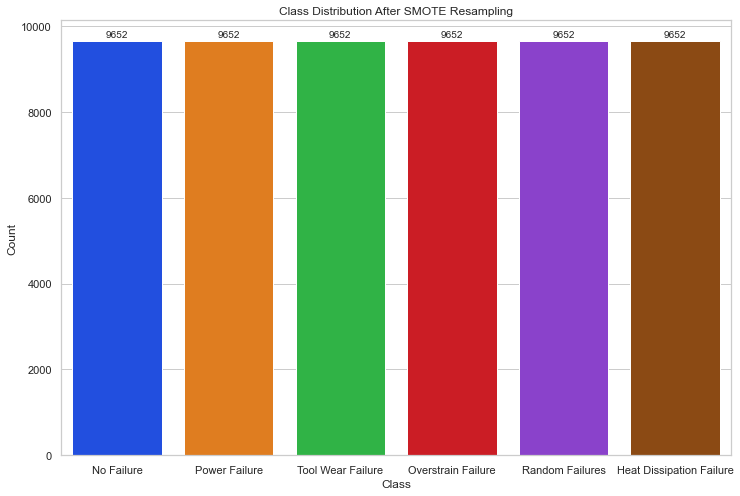

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate counts for each class
class_counts = y_resampled_df.value_counts().sort_index()

# Plot class distribution after resampling with brighter colors
plt.figure(figsize=(12, 8))
sns.countplot(x=y_resampled_df, palette='bright')  # Use 'bright' palette
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Display count values on each bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

**- Examine relationships between categorical variables Using crosstabs:**

<Figure size 864x576 with 0 Axes>

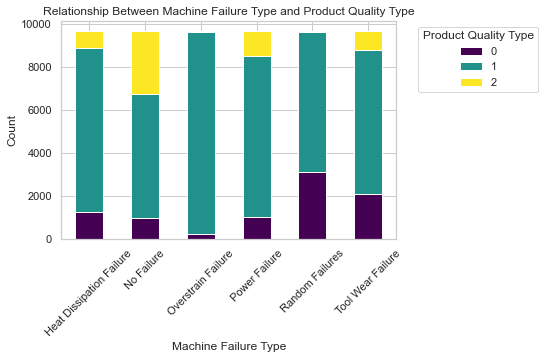

In [333]:
import matplotlib.pyplot as plt

# Create crosstab
crosstab = pd.crosstab(y_resampled_df, X_resampled_df['Product Quality Type'])

# Plot stacked bar plot
plt.figure(figsize=(12, 8))
crosstab.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Relationship Between Machine Failure Type and Product Quality Type')
plt.xlabel('Machine Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Product Quality Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**- Insight:**

- Notably, both machine failure types, Random Failure and Overstrain Failure, lack occurrences of Product Quality Type 2 or H.


- Product Quality Type 0 is infrequently associated with Overstrain Failure.


- Product Quality Type 1 exhibits a strong association with all machine failure classes.

# D2.4: Feature Engineering:

**- Create new features:**

In [334]:
# 1. Temperature Differential
X_resampled_df['Temperature Differential'] = X_resampled_df['Process temperature'] - X_resampled_df['Air temperature']

# 2. Power Consumption
X_resampled_df['Power Consumption'] = X_resampled_df['Rotational speed'] * X_resampled_df['Torque']

**- Display the new features:**

In [340]:
X_resampled_df.head()

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Temperature Differential,Power Consumption
0,2,298.100000,308.6,1551,42.8,0,10.500000,66382.8
1,1,298.200000,308.7,1408,46.3,3,10.500000,65190.4
2,1,300.005811,308.5,1498,49.4,5,8.494189,74001.2
3,1,298.200000,308.6,1433,39.5,7,10.400000,56603.5
4,1,298.200000,308.7,1408,40.0,9,10.500000,56320.0


**- Feature Scaling:**

While the most of the features in the dataset follow a normal distribution (also known as Gaussian distribution), it is generally advised to apply standardization rather than min-max scaling.

In [341]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to X_resampled
X_resampled_scaled = scaler.fit_transform(X_resampled_df)

# Check the shape of the standardized data
print("Shape of X_resampled_scaled:", X_resampled_scaled.shape)

Shape of X_resampled_scaled: (57912, 8)


**- Encode the target variable y:**

In [337]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable y_resampled_df
y_encoded = label_encoder.fit_transform(y_resampled_df)

# Create a dictionary containing the encoding for each unique value of y to use it later in prediction
encoding_dict = {label: index for index, label in enumerate(label_encoder.classes_)}

# Print the encoding dictionary
print("Encoding Dictionary:")
print(encoding_dict)

Encoding Dictionary:
{'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


**- Feature Selection:**

In [363]:
import pandas as pd

# Convert X_resampled_scaled to a DataFrame object
X_df = pd.DataFrame(X_resampled_scaled, columns=X_resampled_df.columns)

# Convert y_encoded to a DataFrame object (assuming it's a single column)
y_df = pd.DataFrame(y_encoded, columns=['Machine Failure Type'])

# Calculate correlation coefficients between features and target variable
correlations = X_df.corrwith(y_df['Machine Failure Type'])

# Sort features based on absolute correlation values
sorted_correlations = correlations.abs().sort_values(ascending=False)

# Create a DataFrame to store features and their correlation coefficients
correlation_df = pd.DataFrame({'Feature': sorted_correlations.index, 'Correlation': sorted_correlations.values})

# Print the sorted list of features along with their correlation coefficients
print("Sorted List of Features and their Correlation Coefficients with Target:")
print(correlation_df)

Sorted List of Features and their Correlation Coefficients with Target:
                    Feature  Correlation
0  Temperature Differential     0.384700
1                 Tool wear     0.336974
2           Air temperature     0.250120
3                    Torque     0.246705
4          Rotational speed     0.215250
5         Power Consumption     0.199251
6      Product Quality Type     0.191306
7       Process temperature     0.048941


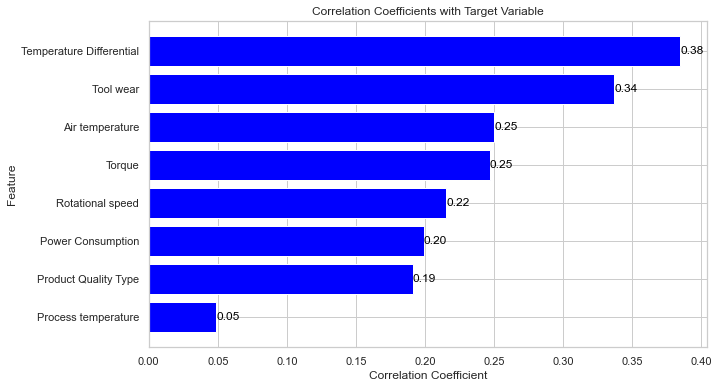

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the sorted correlation coefficients
plt.figure(figsize=(10, 6))
bars = plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Correlation Coefficients with Target Variable')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest correlation at the top

# Add the correlation coefficient values on each bar
for bar, value in zip(bars, correlation_df['Correlation']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
             va='center', ha='left', color='black')

plt.show()

**- Insight:**

After calculating the correlation coefficients between the features and the target variable, we observe that all features exhibit good positive correlation values. This suggests that these features have a strong linear relationship with the target variable. Consequently, selecting all of these features for model training appears to be a favorable strategy.

**- Final Dataset:**

This is the dataset that we will be using to train our models for QuAM.

In [365]:
# Concatenate X_df and y_df along the columns axis
final_dataset = pd.concat([X_df, y_df], axis=1)
final_dataset

,Product Quality Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Temperature Differential,Power Consumption,Machine Failure Type
0,2.122366,-1.372709,-1.338810,0.136228,-0.245156,-2.052525,0.794864,0.016374,1
1,0.101344,-1.317055,-1.258331,-0.322918,-0.005884,-2.009680,0.794864,-0.060898,1
2,0.101344,-0.312045,-1.419289,-0.033945,0.206043,-1.981116,-1.190786,0.510073,1
3,0.101344,-1.317055,-1.338810,-0.242647,-0.470756,-1.952553,0.695870,-0.617359,1
4,0.101344,-1.317055,-1.258331,-0.322918,-0.436574,-1.923989,0.794864,-0.635731,1
...,...,...,...,...,...,...,...,...,...
57907,0.101344,0.816197,1.321592,0.043115,-0.620192,1.003775,0.173851,-0.605140,5
57908,0.101344,0.822630,0.186230,-0.204118,0.124327,1.360819,-1.234175,0.228473,5
57909,0.101344,0.838992,0.698912,0.116964,-0.572345,0.932366,-0.632640,-0.479451,5
57910,2.122366,-0.164063,0.258596,0.540791,-1.118917,1.203719,0.609920,-1.023146,5
